# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


## Start of Result Analysis

In [2]:
# Extract model metric from the saved txt file
import re

pattern = r"(.+?):\s*([\d.]*)"
matches = re.findall(pattern, metrics)
model_metrics = {}
current_model = None
summary = pd.DataFrame()

for key, value in matches:
    key = key.strip()

    # Detect model headers (e.g., LINEAR REGRESSION)
    if key.isupper():
        current_model = key.replace(" ", "_").lower()
        continue

    # Build variable name
    # Example: "Test RMSE" → "test_rmse"
    metric_name = key.lower().replace(" ", "_").replace("²", "2")

    # Combine with model
    var_name = f"{metric_name}_{current_model}"

    # Convert value to float
    model_metrics[var_name] = float(value)
    
display(model_metrics)

{'train_r2_linear_regression': 0.4361,
 'test_r2_linear_regression': 0.2575,
 'train_rmse_linear_regression': 7.89,
 'test_rmse_linear_regression': 8.64,
 'train_mae_linear_regression': 6.45,
 'test_mae_linear_regression': 7.12,
 'train_r2_xgboost': 0.9145,
 'test_r2_xgboost': 0.8102,
 'train_rmse_xgboost': 3.07,
 'test_rmse_xgboost': 4.37,
 'train_mae_xgboost': 2.33,
 'test_mae_xgboost': 3.36}

In [3]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost'],
    'Train RMSE': [model_metrics['train_rmse_linear_regression'], model_metrics['train_rmse_xgboost']],
    'Test RMSE': [model_metrics['test_rmse_linear_regression'], model_metrics['test_rmse_xgboost']],
    'Train R²': [model_metrics['train_r2_linear_regression'], model_metrics['train_r2_xgboost']],
    'Test R²': [model_metrics['test_r2_linear_regression'], model_metrics['test_r2_xgboost']],
    'Train MAE': [model_metrics['train_mae_linear_regression'], model_metrics['train_mae_xgboost']],
    'Test MAE': [model_metrics['test_mae_linear_regression'], model_metrics['test_mae_xgboost']]
})

comparison = comparison.round(4)
comparison['RMSE_diff'] = (comparison['Train RMSE'] - comparison['Test RMSE']).round(2)

print("🏆 Model Comparison")
display(comparison)

# Select best model (lowest test RMSE)
best_model_idx = comparison['Test RMSE'].idxmin()
best_model_name = comparison.loc[best_model_idx, 'Model']

print(f"""🏆 Best Model: {best_model_name}

- Test RMSE: {comparison.loc[best_model_idx, 'Test RMSE']:.2f}°C
- Test R²: {comparison.loc[best_model_idx, 'Test R²']:.4f}
""")

summary = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE'],
    'Linear Regression': [model_metrics['test_r2_linear_regression'], model_metrics['test_rmse_linear_regression'], model_metrics['test_mae_linear_regression']],
    'XGBoost': [model_metrics['test_r2_xgboost'], model_metrics['test_rmse_xgboost'], model_metrics['test_mae_xgboost']]
})
# summary = comparison.set_index('Model').T
# summary.index.rename('Metric', inplace=True)
summary.to_csv('output/q8_summary.csv', index=False)

🏆 Model Comparison


,Model,Train RMSE,Test RMSE,Train R²,Test R²,Train MAE,Test MAE,RMSE_diff
0,Linear Regression,7.89,8.64,0.4361,0.2575,6.45,7.12,-0.75
1,XGBoost,3.07,4.37,0.9145,0.8102,2.33,3.36,-1.30


🏆 Best Model: XGBoost

- Test RMSE: 4.37°C
- Test R²: 0.8102



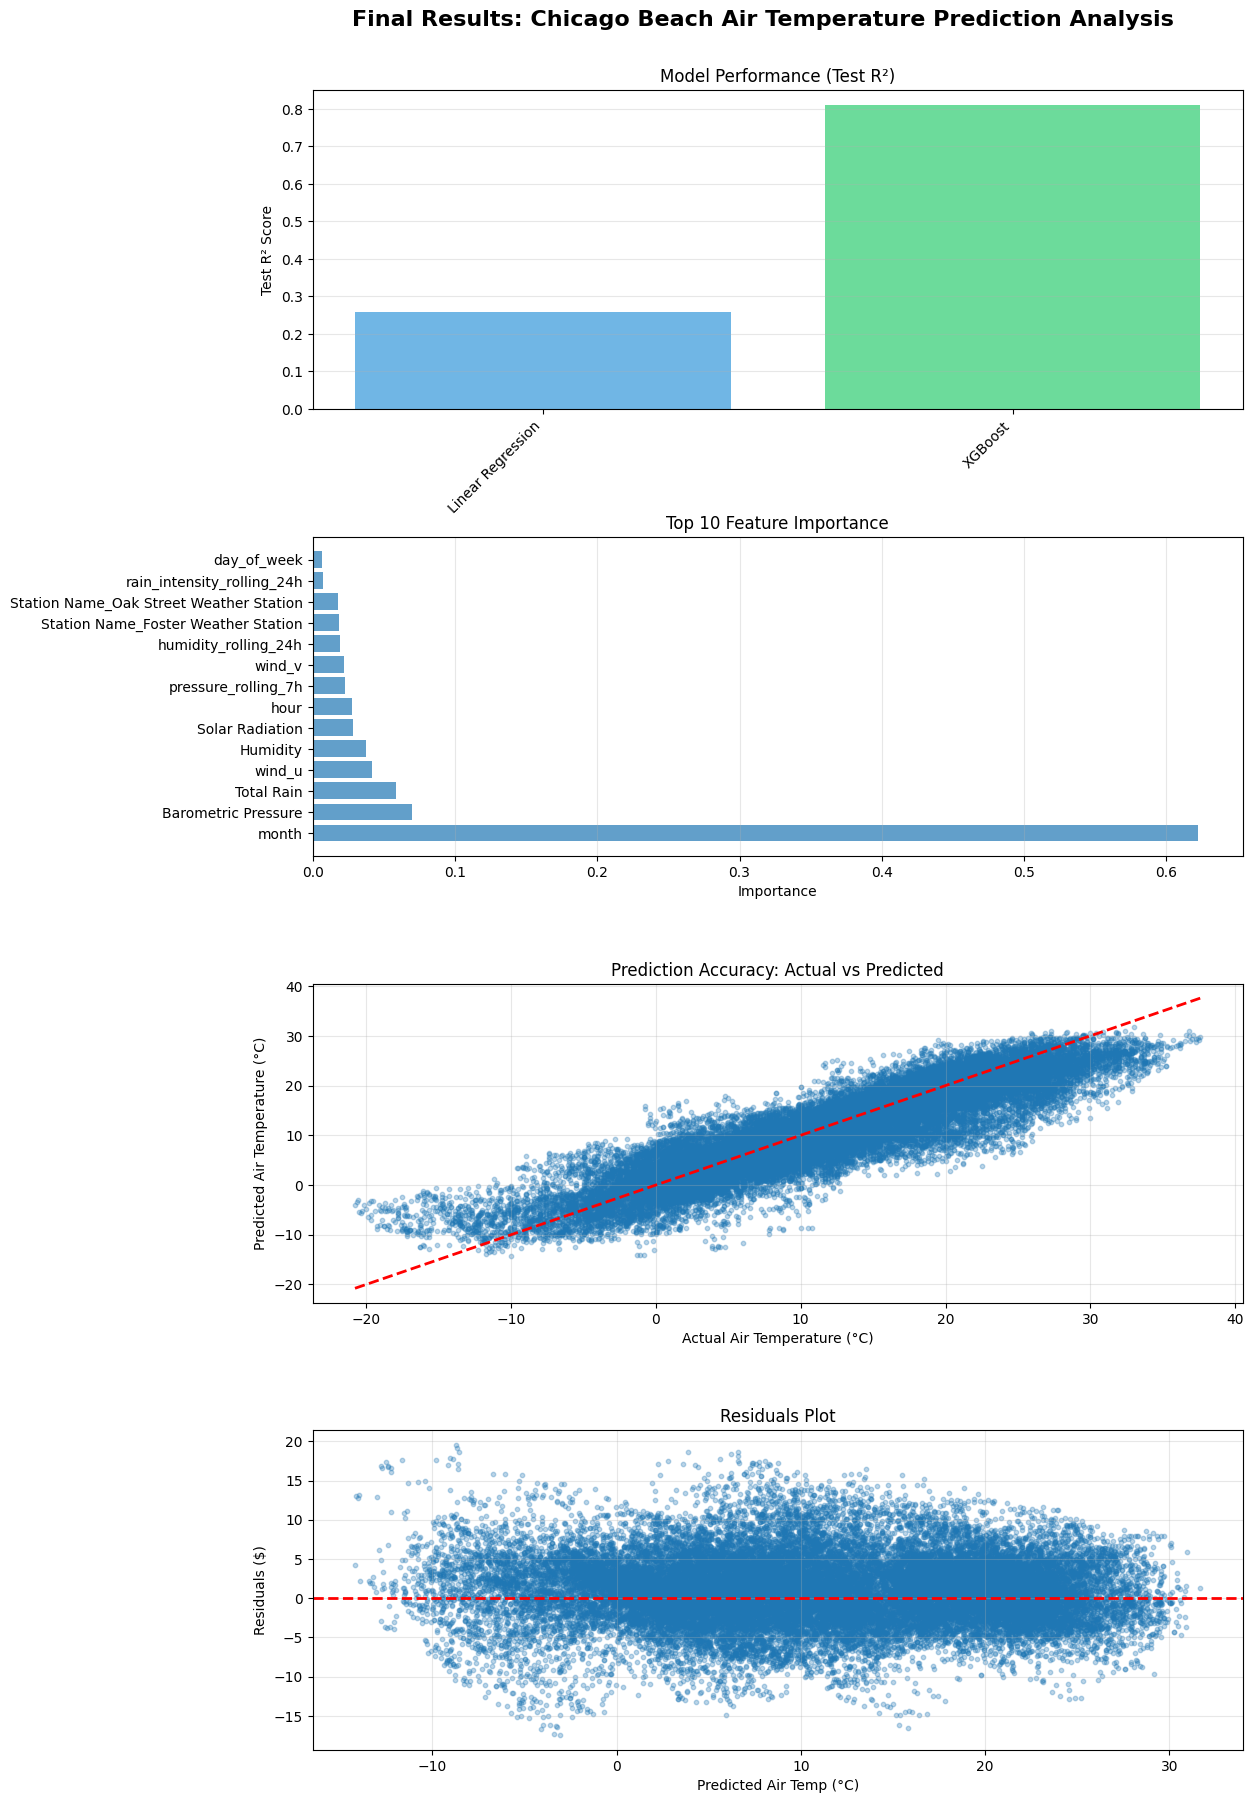

In [4]:
# Final Visualization; adopted from Lecture 11 demo
# Create figure with GridSpec layout for 3 panels
fig = plt.figure(figsize=(12, 20))
gs = fig.add_gridspec(4, 1, hspace=0.4, wspace=0.3)
fig.suptitle('Final Results: Chicago Beach Air Temperature Prediction Analysis', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.94)

# Panel 1: Model comparison (top-left)
ax1 = fig.add_subplot(gs[0, 0])
x_pos = np.arange(len(comparison))
ax1.bar(x_pos, comparison['Test R²'], alpha=0.7, color=['#3498db', '#2ecc71', '#e74c3c'])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison['Model'], rotation=45, ha='right')
ax1.set_ylabel('Test R² Score')
ax1.set_title('Model Performance (Test R²)')
ax1.grid(True, alpha=0.3, axis='y')

# Panel 2: Feature importance (top-right)
ax2 = fig.add_subplot(gs[1, :])
ax2.barh(range(len(feature_importance)), feature_importance['importance'], alpha=0.7)
ax2.set_yticks(range(len(feature_importance)))
ax2.set_yticklabels(feature_importance['feature'])
ax2.set_xlabel('Importance')
ax2.set_title('Top 10 Feature Importance')
ax2.grid(True, alpha=0.3, axis='x')

# Panel 3: Actual vs Predicted (middle row, full width)
if best_model_name == 'XGBoost':
    y_test_pred_best = predictions['predicted_xgboost']
else:
    y_test_pred_best = predictions['predicted_linear']
ax3 = fig.add_subplot(gs[2, :])
ax3.scatter(predictions['actual'], y_test_pred_best, alpha=0.3, s=10)
ax3.plot([predictions['actual'].min(), predictions['actual'].max()], [predictions['actual'].min(), predictions['actual'].max()], 'r--', linewidth=2)
ax3.set_xlabel('Actual Air Temperature (°C)')
ax3.set_ylabel('Predicted Air Temperature (°C)')
ax3.set_title('Prediction Accuracy: Actual vs Predicted')
ax3.grid(True, alpha=0.3)

# Panel 4: Residual plot (XGBoost)
residuals = predictions['actual'] - y_test_pred_best
ax4 = fig.add_subplot(gs[3, :])
ax4.scatter(y_test_pred_best, residuals, alpha=0.3, s=10)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Air Temp (°C)')
ax4.set_ylabel('Residuals ($)')
ax4.set_title('Residuals Plot')
ax4.grid(True, alpha=0.3)

plt.savefig('output/q8_final_visualizations.png', dpi=300, bbox_inches='tight')

In [5]:
# Key Findings Summary
key_findings = f"""KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: {best_model_name} (R² = {comparison.loc[best_model_idx, 'Test R²']:.4f})
- All models show reasonable performance (R² > 0.7 for tree-based models)
- {best_model_name} achieves lowest RMSE: {comparison.loc[best_model_idx, 'Test RMSE']:.2f}°C

FEATURE IMPORTANCE:
- Most important feature: {feature_importance.loc[0, 'feature']} (importance: {feature_importance.loc[0, 'importance']:.4f})
- Top 3 features account for {sum(feature_importance.loc[0:2, 'importance'])*100:.2f}% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- 

DATA QUALITY:
- Dataset cleaned: 196,271 → 182,516 rows
- Missing values handled via backward-fill, mean/mode imputation, and forward-fill
- Outliers capped using domain knowledge and IQR method
"""

with open('output/q8_key_findings.txt', 'w') as f:
    f.write(key_findings)